# ДЗ к Корреляции и регрессии

Возьмите датасет Mortality and Water Hardness**
www.kaggle.com...r-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

### Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график   
Рассчитать коэффициенты корреляции Пирсона и Спирмена   
Построить модель линейной регрессии   
Рассчитать коэффициент детерминации   
Вывести график остатков

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('water.csv').drop(['Unnamed: 0'], axis=1)
df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


In [ ]:
df.describe()

,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


Text(0.5, 1.0, 'Зависимость смертности от жесткости воды')

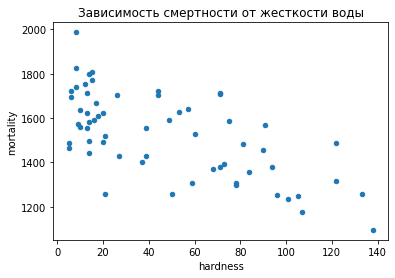

In [ ]:
# корреляция между жесткостью воды и смертностью
df.plot(kind='scatter', x='hardness', y='mortality').set_title('Зависимость смертности от жесткости воды')
# наблюдается слабая обратная корреляция

Text(0.5, 1.0, 'Выбросы')

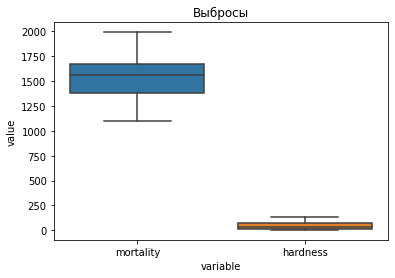

In [ ]:
# посмотрим на наличие выбросов
outlier = pd.DataFrame(data=df, columns=['mortality', 'hardness'])
sns.boxplot(x="variable", y="value", data=pd.melt(outlier)).set_title('Выбросы')
# выбросов нет, вполне можем применить расчет Пирсона

In [ ]:
# предположение выше подтверждается коэффициентом корреляции Пирсона
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [ ]:
# коэффициент корреляции Спирмена
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [ ]:
X=df[['hardness']]
y=df['mortality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Коэффициент:', model.coef_)
print('Интерсепт:', model.intercept_)

Коэффициент: [-3.06000452]
Интерсепт: 1666.9064058902775


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1642.42636972, 1651.60638328, 1587.34628833, 1532.26620695,
       1547.56622955, 1642.42636972, 1584.28628381, 1449.64608487,
       1428.22605322, 1492.48614817, 1605.70631546, 1642.42636972,
       1259.92580454, 1553.6862386 , 1443.52607583, 1293.58585428,
       1648.54637876, 1602.64631094, 1379.26598088])

In [ ]:
y_test

45    1987
2     1466
30    1704
20    1723
17    1428
29    1828
35    1427
60    1378
13    1307
52    1640
15    1491
22    1742
34    1259
27    1402
10    1392
18    1318
40    1696
12    1519
21    1379
Name: mortality, dtype: int64

In [ ]:
# коэффициент детерминации низкий
model.score(X_test, y_test)

0.48094883232122965

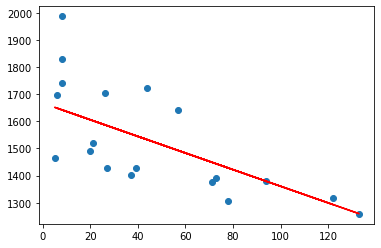

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [ ]:
# рассчитываем остатки
residuals = y_test-y_pred
residuals

45    344.573630
2    -185.606383
30    116.653712
20    190.733793
17   -119.566230
29    185.573630
35   -157.286284
60    -71.646085
13   -121.226053
52    147.513852
15   -114.706315
22     99.573630
34     -0.925805
27   -151.686239
10    -51.526076
18     24.414146
40     47.453621
12    -83.646311
21     -0.265981
Name: mortality, dtype: float64

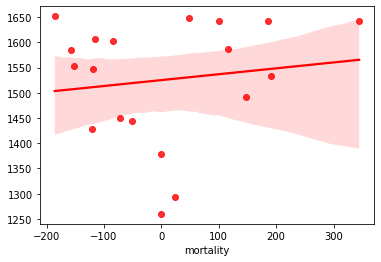

In [ ]:
# графически отображаем остатки
sns.regplot(x = residuals, y = y_pred, data = None, scatter = True, color = 'red')

### Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы   
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [ ]:
# разбиваем данные на две группы: север/юг
df_north = df
df_south = df
df_north = df_north[df_north['location'] == 'North']
df_south = df_south[df_south['location'] == 'South']

Text(0.5, 1.0, 'Корреляция по югу')

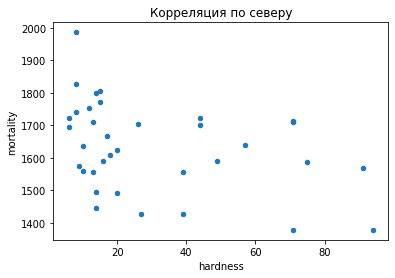

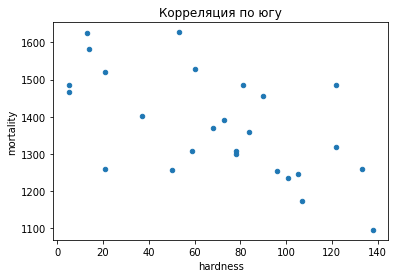

In [ ]:
#так я и не смог отобразить два графика в сетке...
df_north.plot(kind='scatter', x='hardness', y='mortality').set_title('Корреляция по северу')
df_south.plot(kind='scatter', x='hardness', y='mortality').set_title('Корреляция по югу')

In [ ]:
# по северу я не вижу какой-то очевидной кореляции
# по югу можно предположить обратную кореляцию, но очень слабую

In [ ]:
df_north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [ ]:
df_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [ ]:
df_south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [ ]:
df_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


#### Север

In [ ]:
# строим регрессию для северных районов
Xn=df_north[['hardness']]
yn=df_north['mortality']
X_train, X_test, y_train, y_test = train_test_split(Xn, yn, test_size=0.40, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)

print('Коэффициент:', model.coef_)
print('Интерсепт:', model.intercept_)

Коэффициент: [-3.44997348]
Интерсепт: 1710.1682911772123


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1396.22070447, 1558.36945804, 1675.66855637, 1465.22017407,
       1641.16882157, 1451.42028015, 1689.4684503 , 1661.86866245,
       1682.56850333, 1465.22017407, 1682.56850333, 1661.86866245,
       1658.41868897, 1648.06876853])

In [ ]:
y_test

24    1569
31    1702
5     1558
50    1713
55    1625
49    1587
40    1696
46    1495
45    1987
53    1709
29    1828
43    1444
6     1807
4     1609
Name: mortality, dtype: int64

In [ ]:
# коэффициент детерминации отрицательный
model.score(X_test, y_test)

-0.5649934257355071

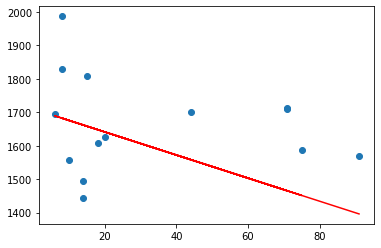

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

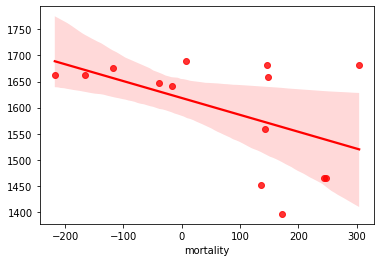

In [ ]:
# остатки по Северу
north_residuals = y_test-y_pred
sns.regplot(x = north_residuals, y = y_pred, data = None, scatter = True, color = 'red')

☝ Модель линейной регрессии не применима к северным районам.   
Недостаточно данных

#### Юг

In [ ]:
# строим регрессию для южных районов
Xs=df_south[['hardness']]
ys=df_south['mortality']
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.40, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)

print('Коэффициент:', model.coef_)
print('Интерсепт:', model.intercept_)

Коэффициент: [-1.61999693]
Интерсепт: 1499.4664621990491


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1335.84677197, 1403.88664315, 1353.66673823, 1363.38671983,
       1402.26664622, 1275.90688545, 1389.30667076, 1418.46661555,
       1381.20668609, 1373.10670143, 1478.40650207])

In [ ]:
y_test

41    1236
33    1309
39    1456
9     1359
56    1527
25    1096
47    1369
48    1257
10    1392
7     1299
54    1625
Name: mortality, dtype: int64

In [ ]:
# коэффициент детерминации низкий
model.score(X_test, y_test)

0.3773007047089243

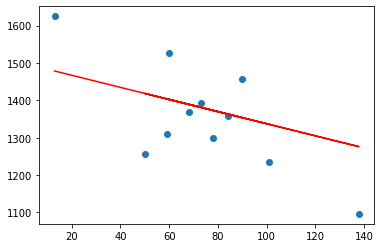

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

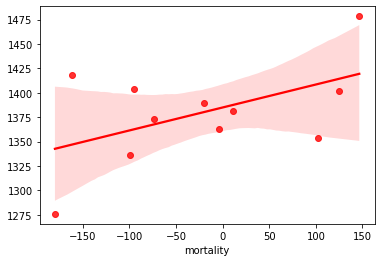

In [ ]:
# остатки по Югу
south_residuals = y_test-y_pred
sns.regplot(x = south_residuals, y = y_pred, data = None, scatter = True, color = 'red')

In [ ]:
☝ Модель линейной регрессии имеет низкую значимость  
Применять для имеющихся данных неэффективно